In [ ]:
import scipy as sp
import numpy as np
from scipy import optimize
from scipy.spatial import distance

In [102]:
def lossfunc(weights, desired, machinespec):
    return distance.cityblock(desired, np.dot(weights.T, machinespec)) # sum(abs(x-y)), where y = machine output

def find_weights(desired, machinespec):
    nchan = machinespec.shape[0]
    opt = optimize.minimize(lossfunc, np.ones(nchan), (desired, machinespec),
                            options={"maxiter": 10000}, bounds=[(0.,None)]*nchan)
    return opt.x

In [5]:
testmachine = np.eye(4)
testmachine[0,1] = 0.2
want = np.array([0.3, 0.2, 0.2, 0.4])
w = find_weights(want, testmachine)

In [3]:
testmachine

array([[1. , 0.2, 0. , 0. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [4]:
want

array([0.3, 0.2, 0.2, 0.4])

In [8]:
out = np.dot(w.T,  testmachine)
out

array([0.30000013, 0.19999998, 0.2       , 0.39999994])

# Actual

In [75]:
gt = np.loadtxt("data/growtainerspectra.tsv", skiprows=1)
wl, gt = gt[...,0], gt[...,1:].T

In [76]:
gt

array([[0.0008, 0.0008, 0.0008, ..., 0.    , 0.    , 0.    ],
       [0.0005, 0.0005, 0.0006, ..., 0.0497, 0.0425, 0.0349],
       [0.0007, 0.0006, 0.0006, ..., 0.    , 0.    , 0.    ],
       [0.0014, 0.0014, 0.0014, ..., 0.0011, 0.0011, 0.0011]])

In [77]:
want = np.ones_like(wl) * 0.3

In [78]:
w = find_weights(want, gt)

In [80]:
w @ gt

array([0.00183627, 0.00181047, 0.0018527 , 0.00191136, 0.00194423,
       0.00200289, 0.00224347, 0.00232793, 0.00252629, 0.00280271,
       0.00299466, 0.00318662, 0.00349247, 0.00403891, 0.00449916,
       0.00502917, 0.00582747, 0.0069984 , 0.00821157, 0.00958086,
       0.0114708 , 0.0138549 , 0.01638683, 0.01943939, 0.02330841,
       0.02772214, 0.03251148, 0.03813198, 0.04513181, 0.05282416,
       0.06125492, 0.071065  , 0.08269631, 0.09495213, 0.10845694,
       0.12412171, 0.14172801, 0.16011493, 0.18056558, 0.20467686,
       0.23234319, 0.26263784, 0.29581077, 0.33202987, 0.37583747,
       0.42479719, 0.47276789, 0.51688134, 0.56929712, 0.62256328,
       0.66510096, 0.69269286, 0.71662413, 0.73280905, 0.73615761,
       0.72093542, 0.69062901, 0.65382573, 0.61830728, 0.57172976,
       0.51555867, 0.4621556 , 0.42061803, 0.38026908, 0.34160167,
       0.30777586, 0.28160676, 0.26169909, 0.24487981, 0.22797435,
       0.21214409, 0.19923798, 0.18739064, 0.17471871, 0.16177

In [81]:
from matplotlib import pyplot as plt

In [84]:
w

array([0.43957289, 0.42229924, 0.25798066, 0.78062517])

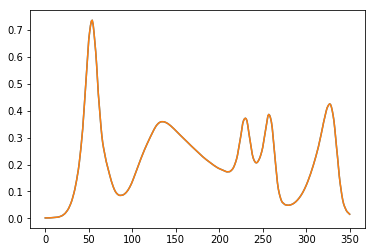

In [83]:
plt.plot(w @ gt)
plt.show()

# Acutal solarcalc

In [87]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import datetime
from light_sim import LightSim

In [88]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2012,1,2)

l = LightSim(start, end, latitude=-35.278454, longitude=149.121483, wavelengths=wl)

Timezone: Australia/Sydney
Have data!!! Calulating temp.
Calculating daily temp,hum,tao...
Calculating spectra...


In [103]:
want = l.combined_spline(1.5)[2:-1]
want

array([1380.59549087, 1311.89607616, 1347.21080598, 1377.93438734,
       1404.56375086, 1427.59727904, 1447.53477142, 1464.8774112 ,
       1480.12773297, 1493.78959195, 1506.36813427, 1518.36976867,
       1530.14452615, 1541.42139877, 1551.77149944, 1560.76497896,
       1567.97104717, 1572.95799363, 1575.29320777, 1574.54319848,
       1570.27361331, 1562.04925713, 1549.69272801, 1534.09700111,
       1516.41769562, 1497.8128743 , 1479.44298454, 1462.47081366,
       1448.06145868, 1437.38231038, 1431.60305176, 1431.89567094,
       1439.05188121, 1452.4566844 , 1471.11719644, 1494.03847369,
       1520.22355498, 1548.67350253, 1578.38744213, 1608.36260218,
       1637.59435199, 1665.07623905, 1689.90931141, 1712.16832841,
       1732.06798595, 1749.82369745, 1765.65151486, 1779.76805867,
       1792.39045669, 1803.73629186, 1814.02355895, 1823.47063029,
       1832.24004713, 1840.2697929 , 1847.44155575, 1853.6368728 ,
       1858.73713225, 1862.62357613, 1865.17730359, 1866.27927

In [104]:
w = find_weights(want, gt)

In [106]:
%matplotlib inline

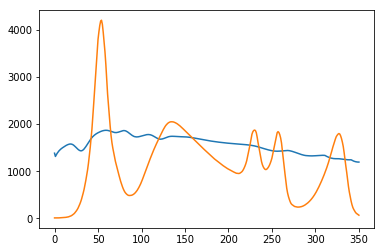

In [112]:
plt.plot(np.stack([want, w @ gt]).T)